In [83]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

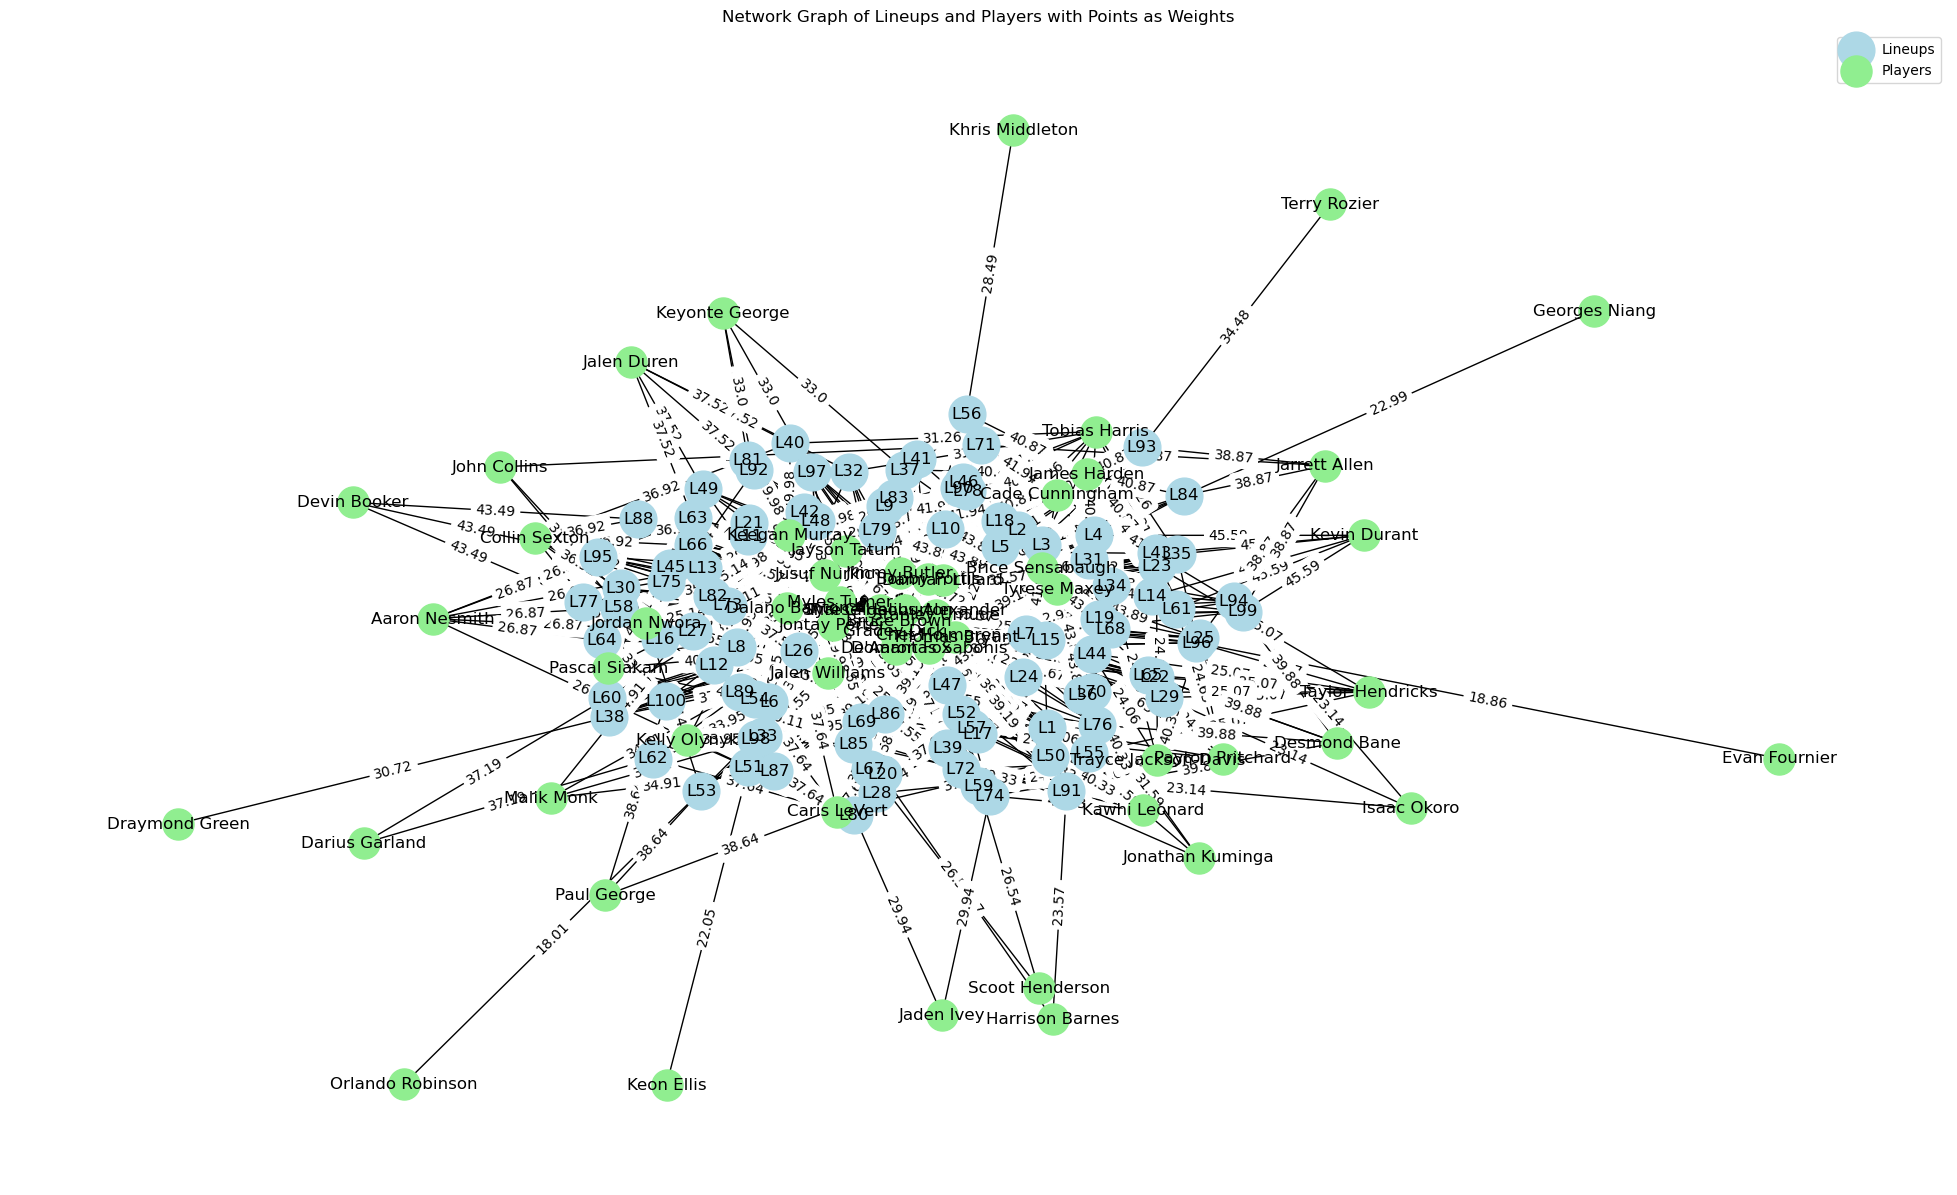

In [84]:
# Load the data
data = pd.read_csv('2_output.csv')

# Initialize a graph
G = nx.Graph()

# Adding nodes for each lineup and player
for index, row in data.iterrows():
    lineup = row['Lineup']
    G.add_node(lineup, type='lineup')
    
    # Add player nodes and edges with weights
    for i in range(1, 8):  # Assuming there are 7 players in each lineup
        player = row[f'Player{i}']
        points = row[f'Points{i}']
        
        # Check if player node already exists, if not add it
        if player not in G:
            G.add_node(player, type='player')
        
        # Add an edge between the lineup and the player with points as weight
        G.add_edge(lineup, player, weight=points)

# Set up the plot size
plt.figure(figsize=(25, 15))  # You can adjust these dimensions to suit your display or requirements

# Drawing the graph
pos = nx.spring_layout(G)  # positions for all nodes using the spring layout
labels = nx.get_edge_attributes(G, 'weight')  # get edge weights for labels

nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'lineup'], node_color='lightblue', node_size=700, label='Lineups')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'player'], node_color='lightgreen', node_size=500, label='Players')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Network Graph of Lineups and Players with Points as Weights')
plt.legend()
plt.axis('off')  # Turn off the axis
plt.show()


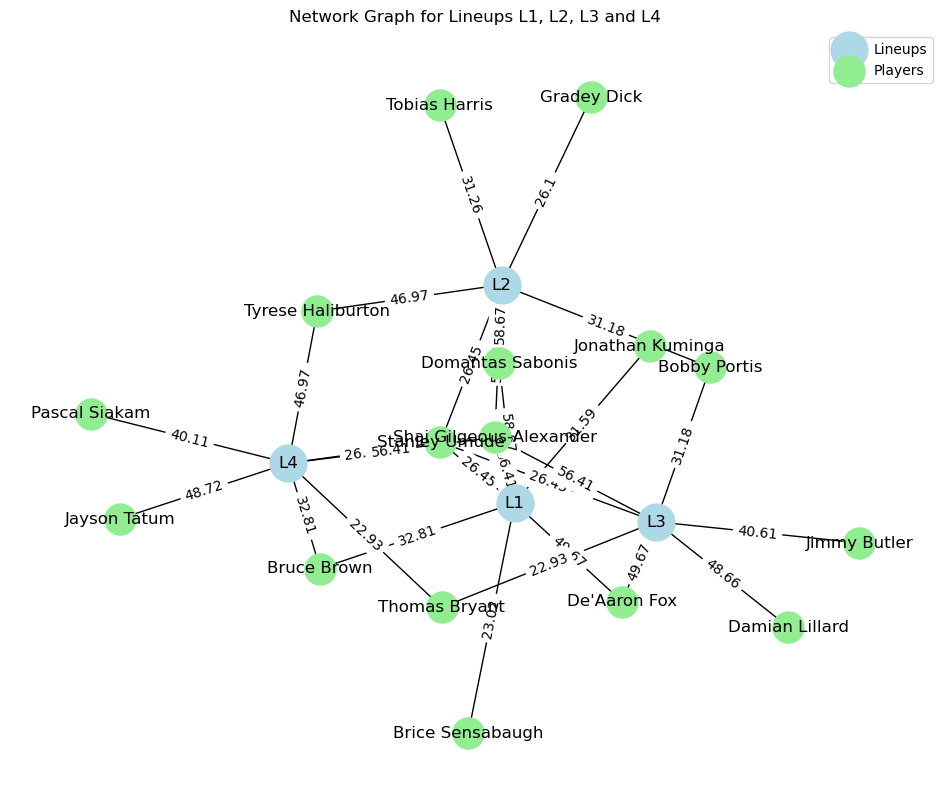

In [85]:
# Load the data
data = pd.read_csv('output.csv')

# Initialize a graph
G = nx.Graph()

# Adding nodes and edges for each lineup and player, focusing only on L1 and L2
for index, row in data.iterrows():
    lineup = row['Lineup']
    if lineup in ['L1', 'L2', 'L3', 'L4']:  # Filter to include only L1 and L2
        G.add_node(lineup, type='lineup')

        # Add player nodes and edges with weights
        for i in range(1, 8):  # Assuming there are 7 players in each lineup
            player = row[f'Player{i}']
            points = row[f'Points{i}']
            
            # Check if player node already exists, if not add it
            if player not in G:
                G.add_node(player, type='player')
            
            # Add an edge between the lineup and the player with points as weight
            G.add_edge(lineup, player, weight=points)

# Set up the plot size
plt.figure(figsize=(12, 10))  # You can adjust these dimensions to suit your display or requirements

# Drawing the subgraph for L1 and L2
pos = nx.spring_layout(G)  # positions for all nodes using the spring layout
labels = nx.get_edge_attributes(G, 'weight')  # get edge weights for labels

nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'lineup'], node_color='lightblue', node_size=700, label='Lineups')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if G.nodes[n]['type'] == 'player'], node_color='lightgreen', node_size=500, label='Players')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Network Graph for Lineups L1, L2, L3 and L4')
plt.legend()
plt.axis('off')  # Turn off the axis
plt.show()
